# Linear Regression from First Principle
This notebook contains code for a simple linear regression model

Author: Ibrahim Salihu Yusuf
Date: October 15, 2019

In [0]:
#import necessary packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# read in the dataset

dataset = pd.read_csv('/content/train.csv')

In [29]:
#Get the input features from the Dataset

input_features = dataset[['rm']]
input_features.head()

,rm
0,6.575
1,6.421
2,6.998
3,7.147
4,6.012


In [30]:
#Get the target from the dataset

target = dataset[['medv']]
target.head()

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9


In [31]:
#Add the coefficient of the bias, which is 1

input_features['bias'] = 1
input_features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rm,bias
0,6.575,1
1,6.421,1
2,6.998,1
3,7.147,1
4,6.012,1


In [32]:
#Initialize weights

weights = np.zeros((input_features.shape[1], 1))

print(weights.shape)

(2, 1)


In [0]:
#define hyper-parameters
learning_rate = 1e-3
steps = 100

#list for tracking cost (losses)
losses = []

In [34]:
x_train = input_features.values
y_train = target.values

for i in range(steps):
  y_pred = np.dot(x_train, weights)
  
  #Evaluate the objective function: MSE
  error = y_train - y_pred
  error_squared = np.power(error, 2)
  MSE = error_squared.sum()/(2 * y_train.shape[0])
  losses.append(MSE)

  #update weights
  gradients = np.dot(x_train.transpose(), error)
  update_parameter = (learning_rate/y_train.shape[0]) * gradients 
  weights = weights + update_parameter
  
  print('{}/{} Loss: {}'.format(i+1, steps, MSE))


1/100 Loss: 301.1583183183183
2/100 Loss: 279.4527492917372
3/100 Loss: 259.4797064921082
4/100 Loss: 241.10089954086746
5/100 Loss: 224.18907640828073
6/100 Loss: 208.6271423315774
7/100 Loss: 194.30734906110686
8/100 Loss: 181.1305488209306
9/100 Loss: 169.00550781833792
10/100 Loss: 157.84827454908603
11/100 Loss: 147.58159852456492
12/100 Loss: 138.1343953962059
13/100 Loss: 129.44125477370102
14/100 Loss: 121.4419873292113
15/100 Loss: 114.08120805175213
16/100 Loss: 107.30795276624625
17/100 Loss: 101.07532526205603
18/100 Loss: 95.34017258774381
19/100 Loss: 90.06278626382979
20/100 Loss: 85.20662734477119
21/100 Loss: 80.73807342651536
22/100 Loss: 76.62618584793012
23/100 Loss: 72.84249547423403
24/100 Loss: 69.36080557920991
25/100 Loss: 66.15701046137553
26/100 Loss: 63.20892853822587
27/100 Loss: 60.49614876290585
28/100 Loss: 57.99988929991624
29/100 Loss: 55.70286748133604
30/100 Loss: 53.589180143148965
31/100 Loss: 51.644193513134006
32/100 Loss: 49.85444188791306
33/10

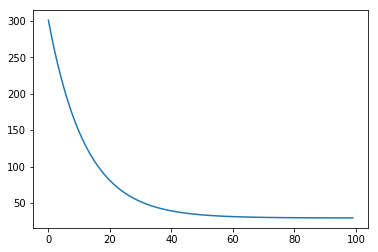

In [35]:
 plt.plot(losses)